# Importing dependencies

In [3]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets 

     ---------------------------------------- 5.4/5.4 MB 14.3 MB/s eta 0:00:00


     ---------------------------------------- 3.0/3.0 MB 19.1 MB/s eta 0:00:00
     -------------------------------------- 101.3/101.3 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 126.4/126.4 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 224.5/224.5 kB 14.3 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=b5d9de62998fd50ac3827d5e43124a9cc8bbf9623c485429a056a62e4e467294
  Stored in directory: c:\users\akshi\appdata\local\pip\cache\wheels\54\4e\28\3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise


In [7]:
# bringing in tensorflow datasets for fashion mnist
import tensorflow as tf
import tensorflow_datasets as tfds
# bringing matplotlib for visualising
from matplotlib import pyplot as plt

In [5]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiohttp                      3.8.4
aiosignal                    1.3.1
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
array-record                 0.2.0
asgiref                      3.5.2
asttokens                    2.0.5
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        21.4.0
audioread                    3.0.0
backcall                     0.2.0
black                        21.12b0
bleach                       4.1.0
cachetools                   5.2.1
certifi                      2022.12.7
cffi                         1.15.0
charset-normalizer           3.0.1
click                        8.0.3
cloudpickle                  2.2.1
colorama                     0.4.4
cycler                       0.11.0
datasets                     2.13.0
debugpy                      1.5.1

In [8]:
# use the tf datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\akshi\tensorflow_datasets\fashion_mnist\3.0.1.incomplete40K8R6\fashion_mnist-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\akshi\tensorflow_datasets\fashion_mnist\3.0.1.incomplete40K8R6\fashion_mnist-test.tfrecord*…

Dataset fashion_mnist downloaded and prepared to C:\Users\akshi\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [10]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

# Visualise data and build dataset

In [12]:
# do some data transformation
import numpy as np

In [11]:
#setup connection via iterator
dataiterator = ds.as_numpy_iterator()

In [18]:
# getting data out of the pipeline
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

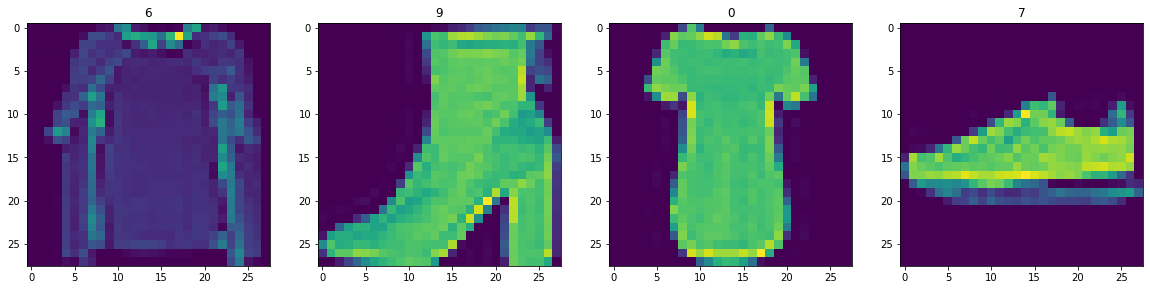

In [17]:
# setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# loop four times and get images
for idx in range(4):
    # grab an image and label
    sample = dataiterator.next()
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # appending the image label as the plot title
    ax[idx].title.set_text(batch['label'])

In [19]:
# scale and return images only
def scale_images(data):
    image = data['image']
    return image/255

In [20]:
# reloaded the dataset
ds = tfds.load('fashion_mnist', split ='train')
# running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# cache the dataset for that batch
ds = ds.cache()
# shuffle it up
ds = ds.shuffle(6000)
# batch into 128 images per sample
ds = ds.batch(128)
# reduces the likelihood of bottlenecking
ds = ds.prefetch(64)


In [21]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network

## Import modelling components 

In [24]:
# bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# bring in the layers for the neural networks
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Build Generator

In [34]:
def build_generator():
    model = Sequential()
    
    
    # takes in random values and reshapes it to 7*7*128
    # beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # convulational block 1
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    
    # convulational block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # conv layer to get to one channel
    model.add(Conv2D(1,4,padding='same', activation ='sigmoid'))
    

    return model

In [109]:
generator = build_generator()

In [40]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [67]:
img = generator.predict(np.random.randn(4,128,1))


1/1 [==============================] - 0s 41ms/step


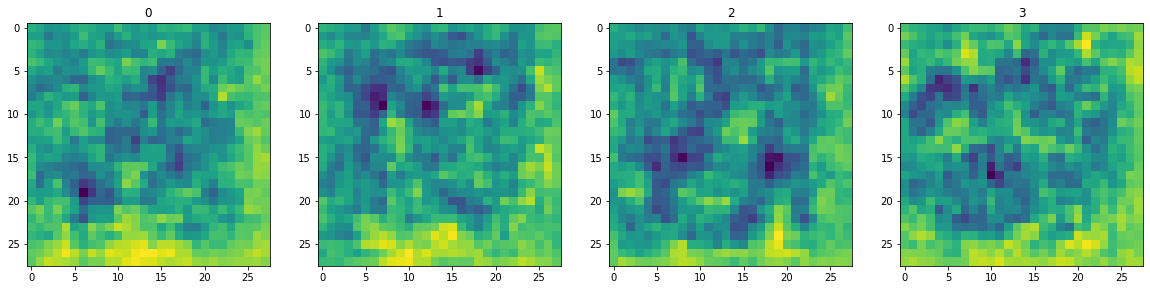

In [52]:
# setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# loop four times and get images
for idx, img in enumerate(img):
    
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # appending the image label as the plot title
    ax[idx].title.set_text(idx)

## Build a discriminator

In [63]:
def build_discriminator():
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [64]:
discriminator = build_discriminator()

In [65]:
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_9 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 128)      

In [68]:
discriminator.predict(img)

1/1 [==============================] - 0s 74ms/step


array([[0.5015015 ],
       [0.5015205 ],
       [0.5015749 ],
       [0.50145435]], dtype=float32)

# Construct training loop

## Setup losses and optimisers

In [69]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [71]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

## Build Subclassed Model

In [73]:
# importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [77]:
tf.random.normal((6,128))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[ 4.56552178e-01,  1.93730772e-01, -4.45659667e-01,
         3.71310800e-01, -1.44743991e+00,  9.30915117e-01,
         4.62867439e-01, -8.70370328e-01, -2.45457482e+00,
        -8.47671449e-01,  5.68114102e-01,  2.35241771e-01,
         8.22872043e-01, -1.43914986e+00,  1.14407730e+00,
        -5.66841483e-01, -1.04924786e+00,  5.73517159e-02,
        -4.55723226e-01, -6.00151241e-01,  3.63758713e-01,
        -8.00074100e-01, -1.39240634e+00, -5.44563770e-01,
        -2.43593264e+00, -1.62746930e+00, -7.92942405e-01,
        -4.14401650e-01,  5.43761373e-01, -1.06476665e+00,
         4.95482206e-01, -1.91420507e+00,  1.33115649e+00,
         1.83372557e-01,  5.19670546e-02, -1.63150176e-01,
         2.82402921e+00,  1.12215340e-01,  5.67195475e-01,
        -1.91764545e+00,  1.20849121e+00,  7.37064779e-01,
         1.15431190e+00,  1.45309389e+00,  1.51656374e-01,
         3.02621388e+00,  1.32242620e+00, -3.92066538e-01,
      

In [100]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}        

In [101]:
# create instance of subclass model
fashgan = FashionGAN(generator, discriminator)

In [102]:
# complile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## Build Callback 

In [103]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [104]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## Train

In [105]:
# recommended 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 4908s 10s/step - d_loss: 0.5701 - g_loss: 0.8402
Epoch 2/20
469/469 [==============================] - 5393s 12s/step - d_loss: 0.6931 - g_loss: 0.7269
Epoch 3/20


KeyboardInterrupt: 

In [118]:
# could not train more than this.
#It was taking a lot of time due to the large size of dataset and my system not being computationally strong.


# Test out the Generator

In [114]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 414ms/step


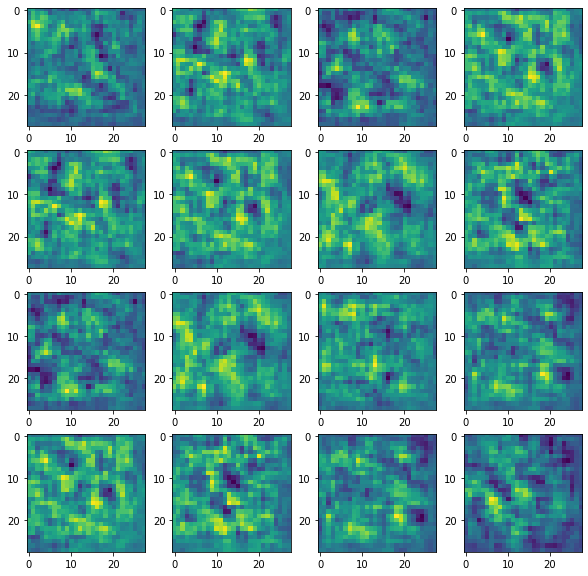

In [115]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [117]:
discriminator.save('discriminator.h5')
generator.save('generator.h5')